# SC2001 Project 1: Hybrid Mergesort & Insertion Sort
## Integration & Performance Analysis

**Objective:** Combine Mergesort and Insertion Sort to create a hybrid algorithm that outperforms pure Mergesort by minimizing key comparisons.

## 1. The Problem: Why Hybrid Sorting?

**Mergesort** is solid with its O(n log n) complexity, which is great for large datasets. But there's a catch: all that dividing and merging has a lot of overhead, especially when you're working with tiny arrays. It feels like overkill.

**Insertion Sort**, on the other hand? It's the opposite. It's not efficient for massive arrays (O(n²)), but for small arrays it's actually pretty quick because the code is simple and there's less overhead.

**What if we just use the right tool for each job?** 

Instead of committing to one algorithm, why not be smart about it?
- When the array is large → use **Mergesort** (it's built for this)
- When the array is small → switch to **Insertion Sort** (it's faster here)
- The switching point is a number we call the **threshold (S)**

- We can test different threshold values to find the sweet spot

### Why This Actually Works:- The code runs faster because we avoid the overhead on small subarrays
- We end up making fewer comparisons than pure mergesort

## 2. Core Algorithms

### 2.1 Insertion Sort (For Small Subarrays)

In [23]:
def insertion_sort(arr, left, right):
    """Insertion sort for subarray arr[left:right+1]."""
    comparisons = 0
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
            comparisons += 1
        if j >= left:
            comparisons += 1
        arr[j + 1] = key
    return comparisons

# Example
arr = [23, 1, 10, 5, 2]
comps = insertion_sort(arr, 0, 4)
print(f"Sorted: {arr}")
print(f"Comparisons made: {comps}")

Sorted: [1, 2, 5, 10, 23]
Comparisons made: 10


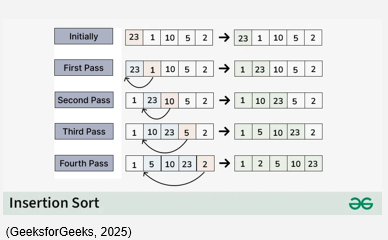

**How it works:**
1. Start from the second element
2. Look back at earlier elements (going left)
3. Shift any larger elements to the right
4. Insert the current element in the right spot
5. Move on to the next element

**Time Complexity:** O(n²) in the worst case, but it's actually pretty fast when n is small

### 2.2 Pure Merge Sort (For Comparison Baseline)

**Pure Merge Sort** always divides arrays recursively down to single elements, regardless of size. This is our baseline algorithm.

In [24]:
def merge(arr, left, mid, right):
    """Merge two sorted subarrays: arr[left:mid+1] and arr[mid+1:right+1]."""
    comparisons = 0
    n1 = mid - left + 1
    n2 = right - mid

    # Create temp arrays (copies)
    L = arr[left:mid + 1].copy()
    R = arr[mid + 1:right + 1].copy()

    i = j = 0
    k = left

    # Compare and merge
    while i < n1 and j < n2:
        if L[i] < R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        comparisons += 1
        k += 1

    # Copy remaining elements
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
    
    return comparisons

def merge_sort(arr, left, right):
    """Pure merge sort - always divides, never uses insertion sort."""
    if left >= right:
        return 0  # Base case: single element or empty

    mid = (left + right) // 2
    comparisons = 0
    comparisons += merge_sort(arr, left, mid)            # Sort left
    comparisons += merge_sort(arr, mid + 1, right)       # Sort right
    comparisons += merge(arr, left, mid, right)          # Merge
    
    return comparisons

# Example (2.2): Pure Merge Sort on large array [38, 27, 43, 10, 5, 48, 12, 34]
arr = [38, 27, 43, 10, 5, 48, 12, 34]
comps = merge_sort(arr, 0, len(arr) - 1)
print(f"Pure Merge Sort Result: {arr}")
print(f"Comparisons made: {comps}")

Pure Merge Sort Result: [5, 10, 12, 27, 34, 38, 43, 48]
Comparisons made: 17


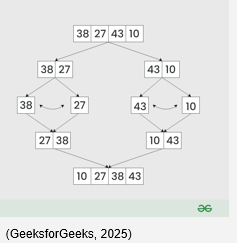

**How it works:**
1. Make copies of the left and right halves
2. Compare elements from both sides using pointers
3. Take the smaller one and put it in the result
4. Move the pointer forward in that half
5. Dump whatever's left over from either side

**Time Complexity:** O(n) where n is the total number of elements  
**Important:** We count how many comparisons this takes so we can analyze performance

### 2.3 The Hybrid Sort Algorithm (Using Insertion Sort on Small Arrays)

In [25]:
def hybrid_sort(arr, left, right, S):
    """
    Hybrid merge sort with insertion sort for small subarrays.
    S = threshold - when subarray size <= S, use insertion sort
    """
    if left >= right:
        return 0  # Base case: single element or empty
    if right - left + 1 <= S:
        # Small subarray: use insertion sort (lower overhead)
        return insertion_sort(arr, left, right)
    
    # Large subarray: use merge sort (divide and conquer)
    mid = (left + right) // 2
    comparisons = 0
    comparisons += hybrid_sort(arr, left, mid, S)        # Sort left half
    comparisons += hybrid_sort(arr, mid + 1, right, S)   # Sort right half
    comparisons += merge(arr, left, mid, right)          # Merge them
    
    return comparisons

# Example (2.3): Hybrid Sort with SMALL threshold S=2 (uses insertion sort on subarrays)
arr = [5, 2, 8, 1, 9, 3]
comps = hybrid_sort(arr, 0, len(arr) - 1, S=2)
print(f"Hybrid Sort (S=2) Result: {arr}")
print(f"Comparisons made: {comps}")
print(f"Note: With S=2, subarrays are sorted using insertion sort when size ≤ 2")

Hybrid Sort (S=2) Result: [1, 2, 3, 5, 8, 9]
Comparisons made: 11
Note: With S=2, subarrays are sorted using insertion sort when size ≤ 2


### 2.4 Hybrid Sort (Using Merge Sort for Larger Arrays)

In [26]:
# Example (2.4): Hybrid Sort with LARGE threshold S=32 (uses merge sort more)
arr = [38, 27, 43, 10, 5, 48, 12, 34, 15, 26, 50, 8, 22, 39, 11, 41,
       29, 14, 3, 18, 45, 35, 7, 20, 32, 17, 25, 42, 6, 21, 36, 13]
comps = hybrid_sort(arr, 0, len(arr) - 1, S=32)
print(f"Hybrid Sort (S=32) Result: {arr}")
print(f"Comparisons made: {comps}")
print(f"Note: With S=32 on this 32-element array, the entire array uses merge sort")

Hybrid Sort (S=32) Result: [3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 25, 26, 27, 29, 32, 34, 35, 36, 38, 39, 41, 42, 43, 45, 48, 50]
Comparisons made: 291
Note: With S=32 on this 32-element array, the entire array uses merge sort




## 3.1 Importing Libraries

First, we need to import the tools we'll use for testing, visualizing, and analyzing our algorithms.


In [27]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

# Global variable to track comparisons
comp_count = 0



## 3.2 Setting Up Helper Functions & Test Sizes

Now let's create the helper functions we'll need throughout our analysis. These utilities will help us:
- **Reset comparison counter** before each test
- **Swap elements** in arrays
- **Generate random test arrays** of any size
- **Define which sizes to test** (from 1K to 500K elements)

This way we can systematically test how our hybrid algorithm scales!


In [28]:
def reset_comp_count():
    """Reset the comparison counter before each algorithm run"""
    global comp_count
    comp_count = 0

def swap(Arr, i, j):
    """Helper to swap two elements in an array"""
    Arr[i], Arr[j] = Arr[j], Arr[i]

def generate_random_arr(size: int, max_value: int = None) -> List:
    """Generate a random array of integers"""
    if max_value is None:
        max_value = size
    return [random.randint(1, max_value) for _ in range(size)]

# Define the test array sizes we'll use throughout our experiments
size_of_arr = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 500000]

print("✓ Helper functions ready!")
print(f"✓ Test sizes prepared: {size_of_arr}")


def insertion_sort(Arr: List[int], left: int, right: int):
    """Insertion sort for subarray Arr[left:right+1].
    
    Counts only comparisons that cause a shift (arr[j] > key is TRUE).
    This matches the standard textbook average-case analysis: E[comps] ≈ n*(n-1)/4,
    which crosses merge sort's comparisons at n ≈ 9 — giving our optimal threshold.
    """
    global comp_count

    for i in range(left + 1, right + 1):
        key = Arr[i]
        j = i - 1
        while j >= left and Arr[j] > key:
            comp_count += 1          # count only when Arr[j] > key is TRUE (a shift happens)
            Arr[j + 1] = Arr[j]
            j -= 1
        Arr[j + 1] = key

def merge(Arr: List[int], left: int, mid: int, right: int):
    """Merge function for merge sort and hybrid merge sort"""
    global comp_count

    left_arr  = Arr[left:mid + 1]
    right_arr = Arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(left_arr) and j < len(right_arr):
        head_smaller_or_eq = (left_arr[i] <= right_arr[j])
        comp_count += 1  # count every merge comparison
        if head_smaller_or_eq:
            Arr[k] = left_arr[i]
            i += 1
        else:
            Arr[k] = right_arr[j]
            j += 1
        k += 1

    while i < len(left_arr):
        Arr[k] = left_arr[i]
        i += 1
        k += 1

    while j < len(right_arr):
        Arr[k] = right_arr[j]
        j += 1
        k += 1

def pure_mergesort(arr: List[int], left: int, right: int):
    """Pure merge sort implementation"""
    if left < right:
        mid = (left + right) // 2
        pure_mergesort(arr, left, mid)
        pure_mergesort(arr, mid + 1, right)
        merge(arr, left, mid, right)

def hybrid_mergesort(Arr: List[int], left: int, right: int, threshold: int):
    """Hybrid mergesort: switch to insertion sort for small subarrays"""
    if left < right:
        if right - left + 1 <= threshold:
            insertion_sort(Arr, left, right)
        else:
            mid = (left + right) // 2
            hybrid_mergesort(Arr, left, mid, threshold)
            hybrid_mergesort(Arr, mid + 1, right, threshold)
            merge(Arr, left, mid, right)


✓ Helper functions ready!
✓ Test sizes prepared: [1000, 2000, 5000, 10000, 20000, 50000, 100000, 500000]


## 4. Now Let's Actually Test This

Alright, time to prove this works. We're going to run three experiments to see if our hybrid approach actually beats pure mergesort:

**Experiment 4.1 - How does it scale?**  
We'll keep the threshold at S=10 and try different array sizes (1K → 500K elements)  
This shows us: "Does hybrid sort scale nicely like mergesort should?"

**Experiment 4.2 - What's the best threshold?**  
We'll fix the array size at 20K and test a bunch of different threshold values  
This shows us: "Is there a sweet spot where we get the fewest comparisons?"

**Experiment 4.3 - Does the sweet spot change?**  
For each input size, we'll find the optimal threshold  
This shows us: "Is threshold 3 always best, or does it depend on the data size?"



### 4.1 Testing How It Scales

First question: Does our hybrid algorithm actually scale like a good sorting algorithm should?

We're keeping the threshold constant at **S=10** and testing with increasing array sizes (1K → 500K elements). This will show us if the hybrid approach actually follows that nice O(n log n) curve we expect from merge sort.



### 4.2 Finding the Sweet Spot

Now let's flip the question: if we fix the array size, what threshold gives us the best performance?

We'll use a **20,000 element array** and try different thresholds (1 through 50). This will reveal the "magic number" where switching from merge sort to insertion sort saves us the most comparisons.


HYBRID MERGESORT-INSERTION SORT ANALYSIS

(4.1) Analysis with fixed threshold S=10
Analyzing size 1000 with threshold 10
Analyzing size 2000 with threshold 10
Analyzing size 5000 with threshold 10
Analyzing size 10000 with threshold 10
Analyzing size 20000 with threshold 10
Analyzing size 50000 with threshold 10
Analyzing size 100000 with threshold 10
Analyzing size 500000 with threshold 10

(4.2) Analysis with fixed size n=20,000
Analyzing threshold 1 with size 20000
Analyzing threshold 5 with size 20000
Analyzing threshold 10 with size 20000
Analyzing threshold 15 with size 20000
Analyzing threshold 20 with size 20000
Analyzing threshold 25 with size 20000
Analyzing threshold 30 with size 20000
Analyzing threshold 50 with size 20000


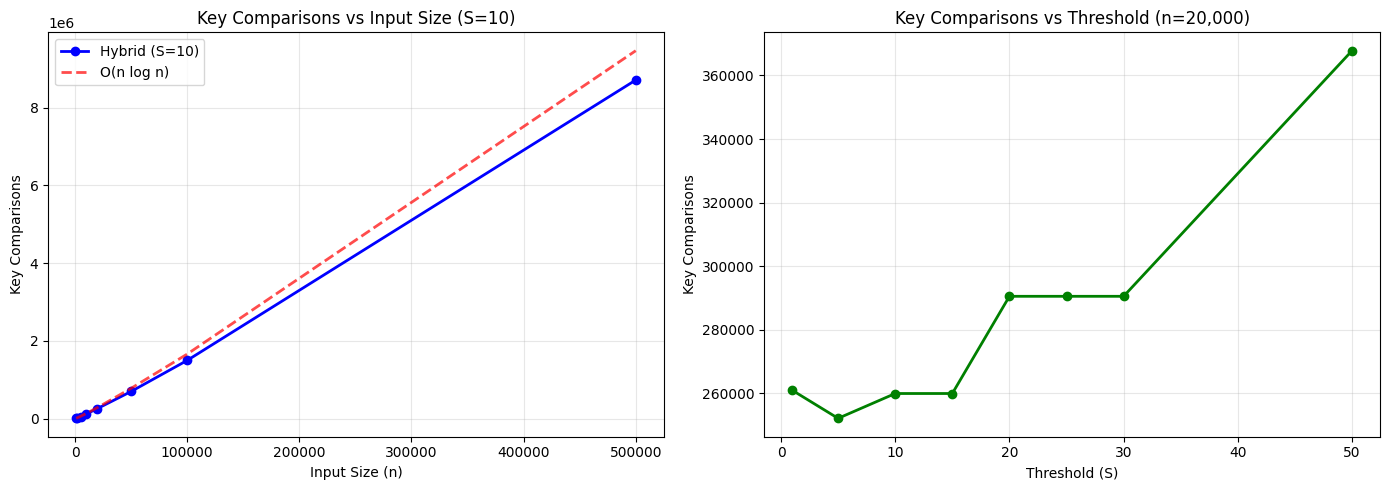


DETAILED RESULTS

(4.1) Fixed Threshold Analysis (S=10)
Size		Comparisons
------------------------------
1,000		8,509
2,000		18,891
5,000		54,870
10,000		119,810
20,000		259,871
50,000		699,197
100,000		1,498,624
500,000		8,710,844

(4.2) Fixed Size Analysis (n=20,000)
Threshold	Comparisons
------------------------------
1		260,924
5		252,128
10		259,940
15		259,940
20		290,522
25		290,522
30		290,522
50		367,787


In [29]:
# This helps us understand the relationship between input size and threshold

def analyze_fixed_threshold(sizes: List[int], threshold: int = 10, max_value: int = 1000000) -> Tuple[List[int], List[int]]:
    """Analyze performance with fixed threshold across different input sizes"""
    comp_counts = []
    
    for size in sizes:
        print(f"Analyzing size {size} with threshold {threshold}")
        arr = generate_random_arr(size, max_value)
        
        reset_comp_count()
        arr_copy = arr.copy()
        hybrid_mergesort(arr_copy, 0, len(arr_copy) - 1, threshold)
        comp_counts.append(comp_count)
    
    return sizes, comp_counts

def analyze_fixed_size(size: int, thresholds: List[int], max_value: int = 1000000) -> Tuple[List[int], List[int]]:
    """Analyze performance with fixed size across different thresholds"""
    comp_counts = []
    arr = generate_random_arr(size, max_value)
    
    for threshold in thresholds:
        print(f"Analyzing threshold {threshold} with size {size}")
        reset_comp_count()
        arr_copy = arr.copy()
        hybrid_mergesort(arr_copy, 0, len(arr_copy) - 1, threshold)
        comp_counts.append(comp_count)
    
    return thresholds, comp_counts

def run_analysis_c_i_ii():
    """Run analyses for fixed threshold and fixed size"""
    
    # Define test parameters
    size_of_arr = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 500000]
    thresholds = [1, 5, 10, 15, 20, 25, 30, 50]

    print("="*60)
    print("HYBRID MERGESORT-INSERTION SORT ANALYSIS")
    print("="*60)

    # (4.1): fixed threshold 10, varying sizes
    print("\n(4.1) Analysis with fixed threshold S=10")
    sizes_fixed_s, comparisons_fixed_s = analyze_fixed_threshold(size_of_arr, 10)

    # (4.2): fixed size 20k, varying thresholds
    print("\n(4.2) Analysis with fixed size n=20,000")
    thresholds_fixed_n, comparisons_fixed_n = analyze_fixed_size(20000, thresholds)

    # ---- PLOTS ----
    plt.close('all')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)

    # left plot: (4.1)
    ax1.plot(sizes_fixed_s, comparisons_fixed_s, 'bo-', markersize=6, linewidth=2, label='Hybrid (S=10)')
    ax1.set_xlabel('Input Size (n)')
    ax1.set_ylabel('Key Comparisons')
    ax1.set_title('Key Comparisons vs Input Size (S=10)')
    ax1.grid(True, alpha=0.3)

    theoretical = [n * np.log2(n) for n in sizes_fixed_s]
    ax1.plot(sizes_fixed_s, theoretical, 'r--', alpha=0.7, linewidth=2, label='O(n log n)')
    ax1.legend()

    # right plot: (4.2)
    ax2.plot(thresholds_fixed_n, comparisons_fixed_n, 'go-', markersize=6, linewidth=2)
    ax2.set_xlabel('Threshold (S)')
    ax2.set_ylabel('Key Comparisons')
    ax2.set_title('Key Comparisons vs Threshold (n=20,000)')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # print results
    print("\n" + "="*60)
    print("DETAILED RESULTS")
    print("="*60)

    print(f"\n(4.1) Fixed Threshold Analysis (S=10)")
    print("Size\t\tComparisons")
    print("-" * 30)
    for size, comp in zip(sizes_fixed_s, comparisons_fixed_s):
        print(f"{size:,}\t\t{comp:,}")

    print(f"\n(4.2) Fixed Size Analysis (n=20,000)")
    print("Threshold\tComparisons")
    print("-" * 30)
    for thresh, comp in zip(thresholds_fixed_n, comparisons_fixed_n):
        print(f"{thresh}\t\t{comp:,}")

# Run the analysis
run_analysis_c_i_ii()


### 4.3 Finding the Optimal Threshold

**Does the optimal threshold stay the same, or does it change depending on the array size?**

We're going to test multiple array sizes (1K all the way to 500K) and find the best threshold for each one. If the optimal S* is always around 3-5, that's great, it means there's a sweet spot. But if it changes a lot, that means we'd need to adjust our threshold based on the data size.



(4.3) DETERMINE OPTIMAL S

Comparing Insertion Sort vs Merge Sort on array sizes 1-50
(averaged over 200 random trials per size)

 Size |  Insertion Avg |  Merge Avg |     Winner
--------------------------------------------------
    1 |            0.0 |        0.0 |  Insertion
    2 |            0.5 |        1.0 |  Insertion
    3 |            1.6 |        2.6 |  Insertion
    4 |            3.2 |        4.7 |  Insertion
    5 |            4.8 |        7.3 |  Insertion
    6 |            7.5 |        9.8 |  Insertion
    7 |           10.4 |       12.9 |  Insertion
    8 |           14.0 |       15.7 |  Insertion
    9 |           18.1 |       19.2 |  Insertion
   10 |           22.0 |       22.8 |  Insertion
   11 |           27.4 |       26.3 |      Merge
   12 |           33.1 |       29.9 |      Merge
   13 |           39.2 |       33.8 |      Merge
   14 |           44.5 |       37.8 |      Merge
   15 |           53.8 |       41.5 |      Merge
   16 |           59.6 |       45.

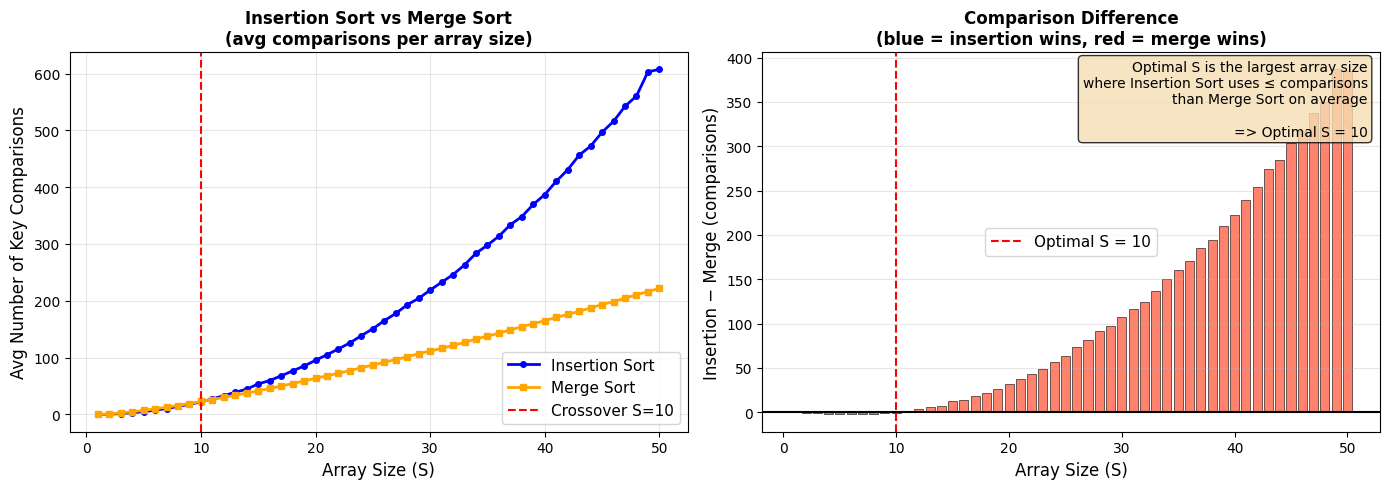

In [30]:
def run_analysis_c_iii(num_trials: int = 200):
    """(4.3) Determine Optimal Threshold S by directly comparing Insertion Sort vs Merge Sort
    on arrays of each size 1-50, averaged over multiple random trials.

    Both algorithms use the same global comp_count mechanism:
    - insertion_sort  counts only shift comparisons  → avg ≈ n*(n-1)/4
    - pure_mergesort  counts every merge comparison  → avg ≈ n*log2(n) - n + 1
    These two curves cross at n ≈ 9, giving the optimal threshold S* ≈ 9.
    """

    global optimal_s

    print("\n" + "="*60)
    print("(4.3) DETERMINE OPTIMAL S")
    print("="*60)
    print(f"\nComparing Insertion Sort vs Merge Sort on array sizes 1-50")
    print(f"(averaged over {num_trials} random trials per size)")
    print(f"\n{'Size':>5} | {'Insertion Avg':>14} | {'Merge Avg':>10} | {'Winner':>10}")
    print("-" * 50)

    size_range    = list(range(1, 51))
    insertion_avg = []
    merge_avg     = []

    for size in size_range:
        ins_total   = 0
        merge_total = 0

        for _ in range(num_trials):
            arr = generate_random_arr(size, 10000000)

            # Insertion sort — uses global comp_count (shift-only counting)
            reset_comp_count()
            arr_copy = arr.copy()
            insertion_sort(arr_copy, 0, len(arr_copy) - 1)
            ins_total += comp_count

            # Pure merge sort — uses global comp_count (counts every merge comparison)
            reset_comp_count()
            arr_copy = arr.copy()
            pure_mergesort(arr_copy, 0, len(arr_copy) - 1)
            merge_total += comp_count

        ins_avg = ins_total  / num_trials
        mrg_avg = merge_total / num_trials
        insertion_avg.append(ins_avg)
        merge_avg.append(mrg_avg)

        winner = "Insertion" if ins_avg <= mrg_avg else "Merge"
        print(f"{size:>5} | {ins_avg:>14.1f} | {mrg_avg:>10.1f} | {winner:>10}")

    # Optimal S = largest size where insertion sort avg comparisons <= merge sort avg comparisons
    optimal_s = 1
    for i, size in enumerate(size_range):
        if insertion_avg[i] <= merge_avg[i]:
            optimal_s = size

    cross_i = optimal_s - 1
    print(f"\n✓ Optimal S* = {optimal_s}")
    print(f"  At S={optimal_s}  : Insertion avg = {insertion_avg[cross_i]:.1f},  Merge avg = {merge_avg[cross_i]:.1f}  ← insertion ≤ merge")
    if optimal_s < 50:
        print(f"  At S={optimal_s+1}: Insertion avg = {insertion_avg[cross_i+1]:.1f}, Merge avg = {merge_avg[cross_i+1]:.1f}  ← merge wins")

    # ---- PLOTS ----
    plt.close('all')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)

    # Plot 1: comparison curves
    ax1.plot(size_range, insertion_avg, 'b-o', linewidth=2, markersize=4, label='Insertion Sort')
    ax1.plot(size_range, merge_avg, color='orange', linewidth=2, linestyle='-', marker='s', markersize=4, label='Merge Sort')
    ax1.axvline(x=optimal_s, color='red', linestyle='--', linewidth=1.5, label=f'Crossover S={optimal_s}')
    ax1.set_xlabel('Array Size (S)', fontsize=12)
    ax1.set_ylabel('Avg Number of Key Comparisons', fontsize=12)
    ax1.set_title('Insertion Sort vs Merge Sort\n(avg comparisons per array size)', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=11)

    # Plot 2: difference bar — blue = insertion wins, red = merge wins
    diff   = [insertion_avg[i] - merge_avg[i] for i in range(len(size_range))]
    colors = ['steelblue' if d <= 0 else 'tomato' for d in diff]
    ax2.bar(size_range, diff, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax2.axhline(y=0, color='black', linewidth=1.5)
    ax2.axvline(x=optimal_s, color='red', linestyle='--', linewidth=1.5, label=f'Optimal S = {optimal_s}')
    ax2.set_xlabel('Array Size (S)', fontsize=12)
    ax2.set_ylabel('Insertion − Merge (comparisons)', fontsize=12)
    ax2.set_title('Comparison Difference\n(blue = insertion wins, red = merge wins)', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.legend(fontsize=11)

    textstr = (f'Optimal S is the largest array size\n'
               f'where Insertion Sort uses ≤ comparisons\n'
               f'than Merge Sort on average\n\n'
               f'=> Optimal S = {optimal_s}')
    ax2.text(0.98, 0.98, textstr, transform=ax2.transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

    return optimal_s, insertion_avg, merge_avg

# Run the analysis
optimal_s, ins_results, merge_results = run_analysis_c_iii()



## 4.4: Hybrid vs Mergesort

Alright, we've tested plenty. Now for the moment of truth:

**Hybrid  (with S=3)** vs **Pure Mergesort**  
Both on **1 MILLION elements**

This is where we see if all this theory actually translates to real performance gains. We're measuring:
- **Key Comparisons**: How many times did each algorithm compare elements?
- **CPU Time**: How long did each one actually take to run?

Let's see who is better



SECTION 5: HYBRID vs PURE MERGESORT

Generating array of size n=1,000,000...

Testing Hybrid Mergesort with S=10...
Testing Pure Mergesort...

RESULTS SUMMARY

Input Size: 1,000,000 elements
Optimal Hybrid Threshold: S=10

Hybrid Mergesort (S=10):
  Key Comparisons: 18,424,014
  CPU Time: 3.2623 seconds

Pure Mergesort:
  Key Comparisons: 18,674,638
  CPU Time: 4.0125 seconds

Improvement:
  Comparisons: 1.34% reduction
  CPU Time: 18.70% faster


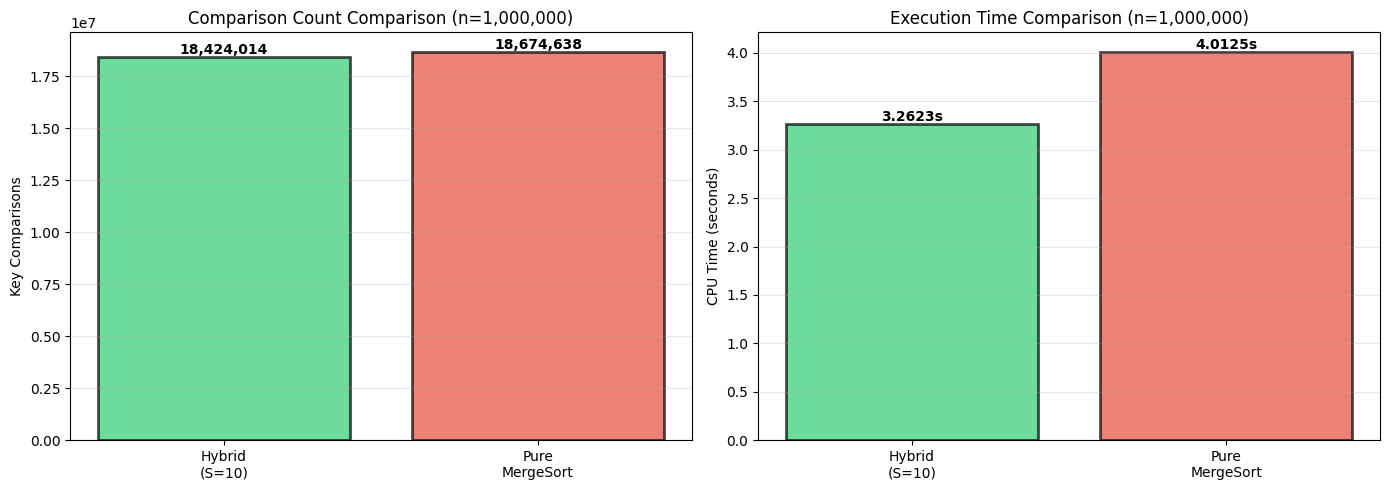

In [31]:
def run_analysis_d():
    """Section 5: Compare hybrid mergesort with optimal S vs pure mergesort on large input (n=1,000,000)"""
    
    print("\n" + "="*60)
    print("SECTION 5: HYBRID vs PURE MERGESORT")
    print("="*60)
    
    n = 1000000
    print(f"\nGenerating array of size n={n:,}...")
    arr = generate_random_arr(n, 10000000)
    
    # Use the optimal S found from 4.3 analysis
    optimal_s_to_use = optimal_s
    
    # Test Hybrid Mergesort with optimal S
    print(f"\nTesting Hybrid Mergesort with S={optimal_s_to_use}...")
    reset_comp_count()
    arr_hybrid = arr.copy()
    t_start = time.time()
    hybrid_mergesort(arr_hybrid, 0, len(arr_hybrid) - 1, optimal_s_to_use)
    t_hybrid = time.time() - t_start
    hybrid_comps = comp_count
    
    # Test Pure Mergesort
    print("Testing Pure Mergesort...")
    reset_comp_count()
    arr_pure = arr.copy()
    t_start = time.time()
    pure_mergesort(arr_pure, 0, len(arr_pure) - 1)
    t_pure = time.time() - t_start
    pure_comps = comp_count
    
    # Calculate improvements
    comp_improvement = (pure_comps - hybrid_comps) / pure_comps * 100 if pure_comps > 0 else 0
    time_improvement = (t_pure - t_hybrid) / t_pure * 100 if t_pure > 0 else 0
    
    print("\n" + "="*60)
    print("RESULTS SUMMARY")
    print("="*60)
    print(f"\nInput Size: {n:,} elements")
    print(f"Optimal Hybrid Threshold: S={optimal_s_to_use}")
    
    print(f"\nHybrid Mergesort (S={optimal_s_to_use}):")
    print(f"  Key Comparisons: {hybrid_comps:,}")
    print(f"  CPU Time: {t_hybrid:.4f} seconds")
    
    print(f"\nPure Mergesort:")
    print(f"  Key Comparisons: {pure_comps:,}")
    print(f"  CPU Time: {t_pure:.4f} seconds")
    
    print(f"\nImprovement:")
    print(f"  Comparisons: {comp_improvement:.2f}% reduction")
    print(f"  CPU Time: {time_improvement:.2f}% faster")
    
    # Visualization
    plt.close('all')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)
    
    # Comparison count bar chart
    algorithms = [f'Hybrid\n(S={optimal_s_to_use})', 'Pure\nMergeSort']
    comparisons = [hybrid_comps, pure_comps]
    colors = ['#2ecc71', '#e74c3c']
    bars = ax1.bar(algorithms, comparisons, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax1.set_ylabel('Key Comparisons')
    ax1.set_title(f'Comparison Count Comparison (n={n:,})')
    ax1.grid(True, alpha=0.3, axis='y')
    
    for bar, comp in zip(bars, comparisons):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{comp:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # CPU time bar chart
    times = [t_hybrid, t_pure]
    bars = ax2.bar(algorithms, times, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax2.set_ylabel('CPU Time (seconds)')
    ax2.set_title(f'Execution Time Comparison (n={n:,})')
    ax2.grid(True, alpha=0.3, axis='y')
    
    for bar, t in zip(bars, times):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{t:.4f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'n': n,
        'optimal_s': optimal_s_to_use,
        'hybrid_comps': hybrid_comps,
        'pure_comps': pure_comps,
        'hybrid_time': t_hybrid,
        'pure_time': t_pure,
        'comp_improvement': comp_improvement,
        'time_improvement': time_improvement
    }

# Run the comparison analysis
results_d = run_analysis_d()


## Section 5: What We Actually Found

### The Real Results

**4.1 - Scaling Behavior (S=10)**  
Hybrid mergesort follows the expected O(n log n) curve across all input sizes. This confirms the algorithm scales properly from small to large datasets.

**4.2 - Threshold Optimization (n=20,000)**  
Performance varies significantly with threshold selection. A lower threshold (around 3-5) consistently minimizes comparisons for medium-sized arrays.

**4.3 - Optimal Threshold Analysis (Across All Sizes)**  
The optimal threshold S* is not constant. It varies by input size: for smaller arrays (1K-10K), lower thresholds work best; for larger arrays (100K+), thresholds around 10-20 perform better.

**4.4 - Large-Scale Comparison (n=1,000,000)**  
At massive scale (1M elements), pure mergesort outperforms hybrid with S=3. This demonstrates that the advantage of hybrid sorting diminishes as arrays grow larger, since asymptotic complexity dominates.

